In [1]:
import joblib
import os
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt

In [2]:
results = defaultdict(dict)

In [3]:
def mse(y, t):
    return np.linalg.norm(y-t, ord=2) / np.linalg.norm(t, ord=2) #np.size(y)

def get_results(dirpath, targets):
    mse_alphas = []
    mse_phi = []
    
    i = 0
    while True:
        path = f'{dirpath}/{str(i)}/polya-mixture.joblib'
        if os.path.exists(path):
            d = joblib.load(f'{dirpath}/{str(i)}/polya-mixture.joblib')
            y_a = d['alphas'].numpy()            
            y_p = d['phi'].numpy()
            t_a = np.array(targets['alphas']).reshape(y_a.shape)
            t_p = np.array(targets['phi']).reshape(y_p.shape)

            if False: # instead of this, just reorder targets
                # Order according to increasing phi value
                y_sorting_indices = np.argsort(y_p)
                t_sorting_indices = np.argsort(t_p)
                y_a = y_a[y_sorting_indices, :] if y_a.ndim == 2 else y_a[y_sorting_indices]
                t_a = t_a[t_sorting_indices, :] if t_a.ndim == 2 else t_a[t_sorting_indices]
                y_p = y_p[y_sorting_indices]
                t_p = t_p[t_sorting_indices]
            
            mse_alphas.append(mse(y_a, t_a))
            mse_phi.append(mse(y_p, t_p))
            i += 1
        else:
            break
    print('y_a', y_a)
    print('t_a', t_a)
    print('y_p', y_p)
    print('t_p', t_p)

    return mse_alphas, mse_phi

In [6]:
dirpath = '/Users/ainecahill/dev/ramsay/mle_params/dp_cifar10_1_mixture_easy_iteration_models'
targets = {'phi': 1.0, 'alphas': [1.0]*10}

a, p = get_results(dirpath, targets)
results['Low heterogeneity - 1 mixture component'] = {'alphas': a, 'phi': p}

y_a [[1.0028371  0.9639542  0.9992347  0.94512653 0.963644   1.0062975
  0.98681045 0.97741115 1.0025628  0.98371196]]
t_a [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
y_p [1.]
t_p [1.]


In [7]:
dirpath = '/Users/ainecahill/dev/ramsay/mle_params/dp_cifar10_2_mixture_easy_iteration_models'
targets = {'phi': [0.5, 0.5], 'alphas': [[0.8]*10, [1.0]*10]}

a, p = get_results(dirpath, targets)
results['Low heterogeneity - 2 mixture components'] = {'alphas': a, 'phi': p}

y_a [[0.8747258  0.81681347 0.8480064  0.8264657  0.8306022  0.86143357
  0.8395898  0.82341945 0.873447   0.87604064]
 [0.9397977  0.85765535 0.85934466 0.86624795 0.85082275 0.8486873
  0.8461703  0.83287054 0.92344683 0.9017847 ]]
t_a [[0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]]
y_p [0.5284575  0.47154242]
t_p [0.5 0.5]


In [8]:
dirpath = '/Users/ainecahill/dev/ramsay/mle_params/dp_cifar10_3_mixture_easy_iteration_models'
targets = {'phi': [0.334, 0.333, 0.333], 'alphas': [[1.1]*10, [0.8]*10, [1.0]*10]}

a, p = get_results(dirpath, targets)
results['Low heterogeneity - 3 mixture components'] = {'alphas': a, 'phi': p}

y_a [[0.8281938  0.81497157 0.83052987 0.8440908  0.82979023 0.8327312
  0.7975926  0.8414207  0.8268275  0.86225414]
 [1.6005932  1.598032   1.6242695  1.1822252  1.8713269  1.2425227
  1.178292   0.9605142  1.7930214  2.0039678 ]
 [0.85345113 0.82715714 0.8330535  0.818717   0.86180615 0.8342099
  0.804135   0.83375996 0.82909316 0.87103945]]
t_a [[1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1]
 [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]]
y_p [0.51577884 0.00285536 0.48136583]
t_p [0.334 0.333 0.333]


In [9]:
dirpath = '/Users/ainecahill/dev/ramsay/mle_params/dp_cifar10_1_mixture_medium_iteration_models'
targets = {'phi': 1.0, 'alphas': [0.1, 0.2, 0.6, 1.0, 2.0, 0.1, 1.0, 2.0, 0.5, 0.5]}

a, p = get_results(dirpath, targets)
results['Medium heterogeneity - 1 mixture component'] = {'alphas': a, 'phi': p}

y_a [[4.1778871e-19 6.8996683e-02 5.5241442e-01 9.5902336e-01 2.0915093e+00
  5.6550089e-19 9.7746092e-01 2.0462079e+00 4.0861133e-01 4.3710691e-01]]
t_a [[0.1 0.2 0.6 1.  2.  0.1 1.  2.  0.5 0.5]]
y_p [1.]
t_p [1.]


In [10]:
dirpath = '/Users/ainecahill/dev/ramsay/mle_params/dp_cifar10_2_mixture_medium_iteration_models'
targets = {'phi': [0.4, 0.6], 'alphas': [[0.1, 0.2, 0.6, 1.0, 2.0, 0.1, 1.0, 2.0, 0.5, 0.5], [1.1, 0.1, 0.7, 0.9, 1.0, 0.2, 0.5, 1.0, 0.8, 1.5]]}

a, p = get_results(dirpath, targets)
results['Medium heterogeneity - 2 mixture components'] = {'alphas': a, 'phi': p}

y_a [[3.5579636e-11 3.0846801e-03 5.2019125e-01 8.7829101e-01 1.7373333e+00
  5.2171112e-17 9.0956104e-01 1.7595534e+00 4.7007772e-01 5.1660866e-01]
 [9.9630767e-01 3.0629850e-09 6.7218381e-01 8.9647472e-01 9.7798067e-01
  6.0255945e-02 4.1762221e-01 1.0066086e+00 8.2009387e-01 1.4345852e+00]]
t_a [[0.1 0.2 0.6 1.  2.  0.1 1.  2.  0.5 0.5]
 [1.1 0.1 0.7 0.9 1.  0.2 0.5 1.  0.8 1.5]]
y_p [0.3897374 0.6102626]
t_p [0.4 0.6]


In [11]:
dirpath = '/Users/ainecahill/dev/ramsay/mle_params/dp_cifar10_3_mixture_medium_iteration_models'
targets = {'phi': [0.2, 0.3, 0.5], 'alphas': [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [0.1, 0.2, 0.6, 1.0, 2.0, 0.1, 1.0, 2.0, 0.5, 0.5], [1.1, 0.1, 0.7, 0.9, 1.0, 0.2, 0.5, 1.0, 0.8, 1.5]]}

a, p = get_results(dirpath, targets)
results['Medium heterogeneity - 3 mixture components'] = {'alphas': a, 'phi': p}

y_a [[0.42714295 0.09879617 0.464104   0.63281834 0.83826315 0.12836364
  0.47860092 0.8126241  0.4923171  0.67447907]
 [0.00643173 0.00309557 0.01600259 0.01033857 0.0189204  0.4168622
  0.00621111 0.01586634 0.01134487 0.00955095]
 [0.35482812 0.08574848 0.4061973  0.5495379  0.83261645 0.10457151
  0.48779777 0.7602706  0.4399492  0.54287   ]]
t_a [[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.1 0.2 0.6 1.  2.  0.1 1.  2.  0.5 0.5]
 [1.1 0.1 0.7 0.9 1.  0.2 0.5 1.  0.8 1.5]]
y_p [0.85012674 0.00990099 0.1399723 ]
t_p [0.2 0.3 0.5]


In [12]:
dirpath = '/Users/ainecahill/dev/ramsay/mle_params/dp_cifar10_1_mixture_hard_iteration_models'
targets = {'phi': 1.0, 'alphas': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}

a, p = get_results(dirpath, targets)
results['High heterogeneity - 1 mixture component'] = {'alphas': a, 'phi': p}

y_a [[0.08992357 0.08854945 0.08576345 0.08048841 0.09089559 0.08851846
  0.08720964 0.08839368 0.09186389 0.08532739]]
t_a [[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
y_p [1.]
t_p [1.]


In [13]:
dirpath = '/Users/ainecahill/dev/ramsay/mle_params/dp_cifar10_2_mixture_hard_iteration_models'
targets = {'phi': [0.1, 0.9], 'alphas': [[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]]}

a, p = get_results(dirpath, targets)
results['High heterogeneity - 2 mixture components'] = {'alphas': a, 'phi': p}

y_a [[5.44781733e-06 1.41995249e-03 3.87834408e-03 1.44125288e-05
  6.79641205e-04 1.09259145e-05 6.82817699e-06 9.44588646e-06
  1.32023215e-01 7.16188742e-06]
 [2.62103111e-01 2.66785800e-01 2.51747519e-01 2.46510014e-01
  2.42595330e-01 2.43142635e-01 2.32834533e-01 2.47025162e-01
  2.49256328e-01 2.64598399e-01]]
t_a [[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3]]
y_p [0.00990099 0.99009895]
t_p [0.1 0.9]


In [24]:
dirpath = '/Users/ainecahill/dev/ramsay/mle_params/dp_cifar10_3_mixture_hard_iteration_models'
targets = {'phi': [0.8, 0.05, 0.15], 'alphas': [[1.1, 0.1, 0.7, 0.9, 1.0, 0.2, 0.5, 1.0, 0.8, 1.5], [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]]}

a, p = get_results(dirpath, targets)
results['High heterogeneity - 3 mixture components'] = {'alphas': a, 'phi': p}

y_a [[0.842998   0.00700973 0.5104086  0.6736585  0.73971224 0.09656233
  0.36450115 0.76192397 0.59953535 1.0974426 ]
 [0.13331676 0.20412986 0.22457768 0.18494664 0.16056637 0.20557891
  0.21828857 0.17399628 0.19399622 0.14594866]
 [0.2257317  0.02457151 0.07040794 0.08512641 0.1484518  0.04919623
  0.0982815  0.18891534 0.14115487 0.2049988 ]]
t_a [[1.1 0.1 0.7 0.9 1.  0.2 0.5 1.  0.8 1.5]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3]]
y_p [8.92609477e-01 1.07045434e-01 3.45122447e-04]
t_p [0.8  0.05 0.15]


In [36]:
def plot(results, key):
    fig, axs = plt.subplots(3, figsize=(15, 15))
    
    
    for k in results.keys():
        if '1' in k:
            colour = 'red'
        elif '2' in k:
            colour = 'green'
        elif '3' in k:
            colour = 'blue'
    
        if 'Low' in k:
            line = '--+'
            axs[0].plot(results[k][key], line, color=colour, label=k+f' - MSE {key}')
        elif 'Medium' in k:
            line = '-o'
            axs[1].plot(results[k][key], line, color=colour, label=k+f' - MSE {key}')
        else:
            line = '--'
            axs[2].plot(results[k][key], line, color=colour, label=k+f' - MSE {key}')
    
    
    axs[0].legend(loc='upper left', fontsize=14)
    axs[1].legend(loc='upper left', fontsize=14)
    axs[2].legend(loc='upper left', fontsize=14)
    
    # Set labels and titles individually for each subplot if needed.
    axs[0].set_xlabel('Training iterations', fontsize=14)
    axs[0].set_ylabel('Normalised MSE', fontsize=14)
    axs[0].set_title('Low heterogeneity condition', fontsize=14)
    
    axs[1].set_xlabel('Training iterations', fontsize=14)
    axs[1].set_ylabel('Normalised MSE', fontsize=14)
    axs[1].set_title('Medium heterogeneity condition', fontsize=14)
    
    axs[2].set_xlabel('Training iterations', fontsize=14)
    axs[2].set_ylabel('Normalised MSE', fontsize=14)
    axs[2].set_title('High heterogeneity condition', fontsize=14)
        
    
    fig.suptitle(f'Normalised MSE of {key} parameters during training on artificially federated CIFAR-10', fontsize=18)
    plt.tight_layout() 
    fig.savefig(f'dp_cifar10_mse_{key}.jpg', format='jpg', dpi=300)
    return fig

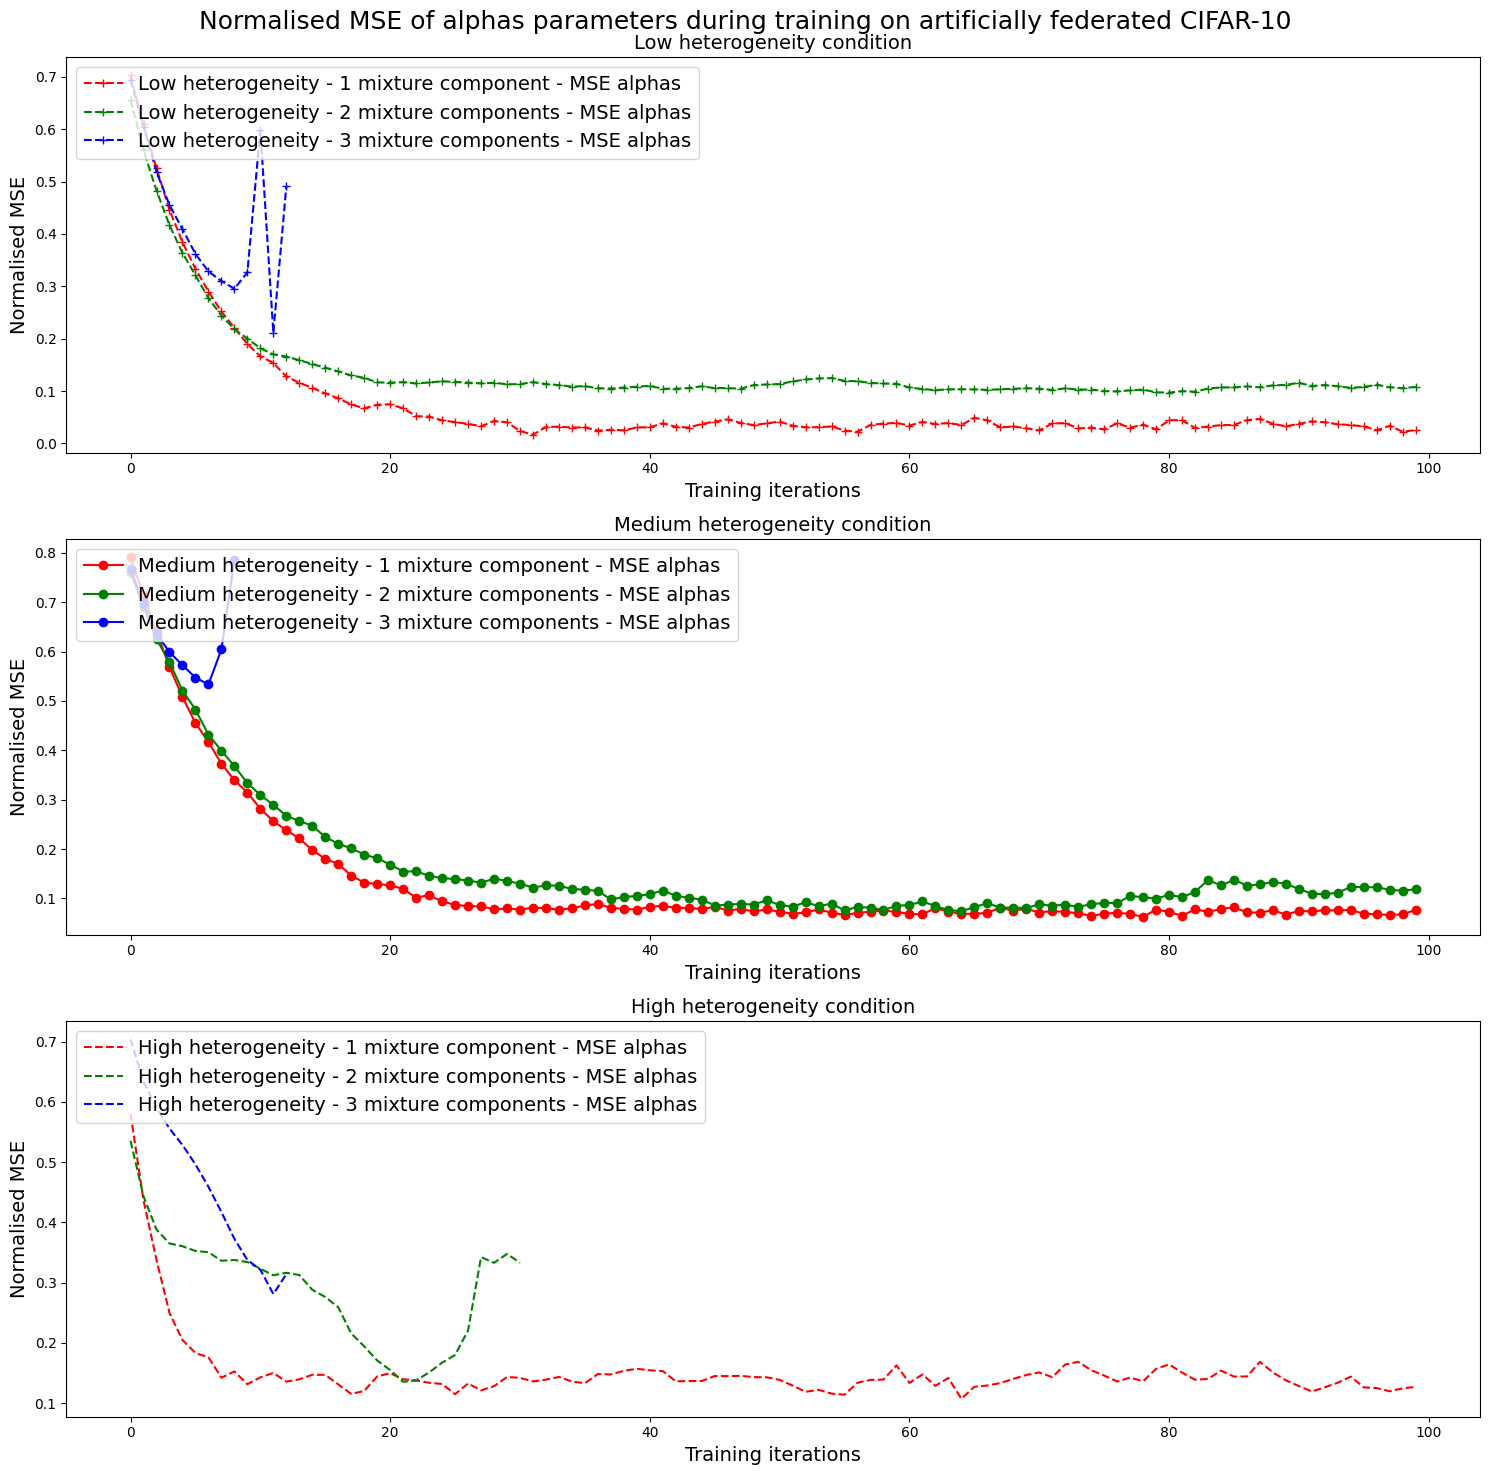

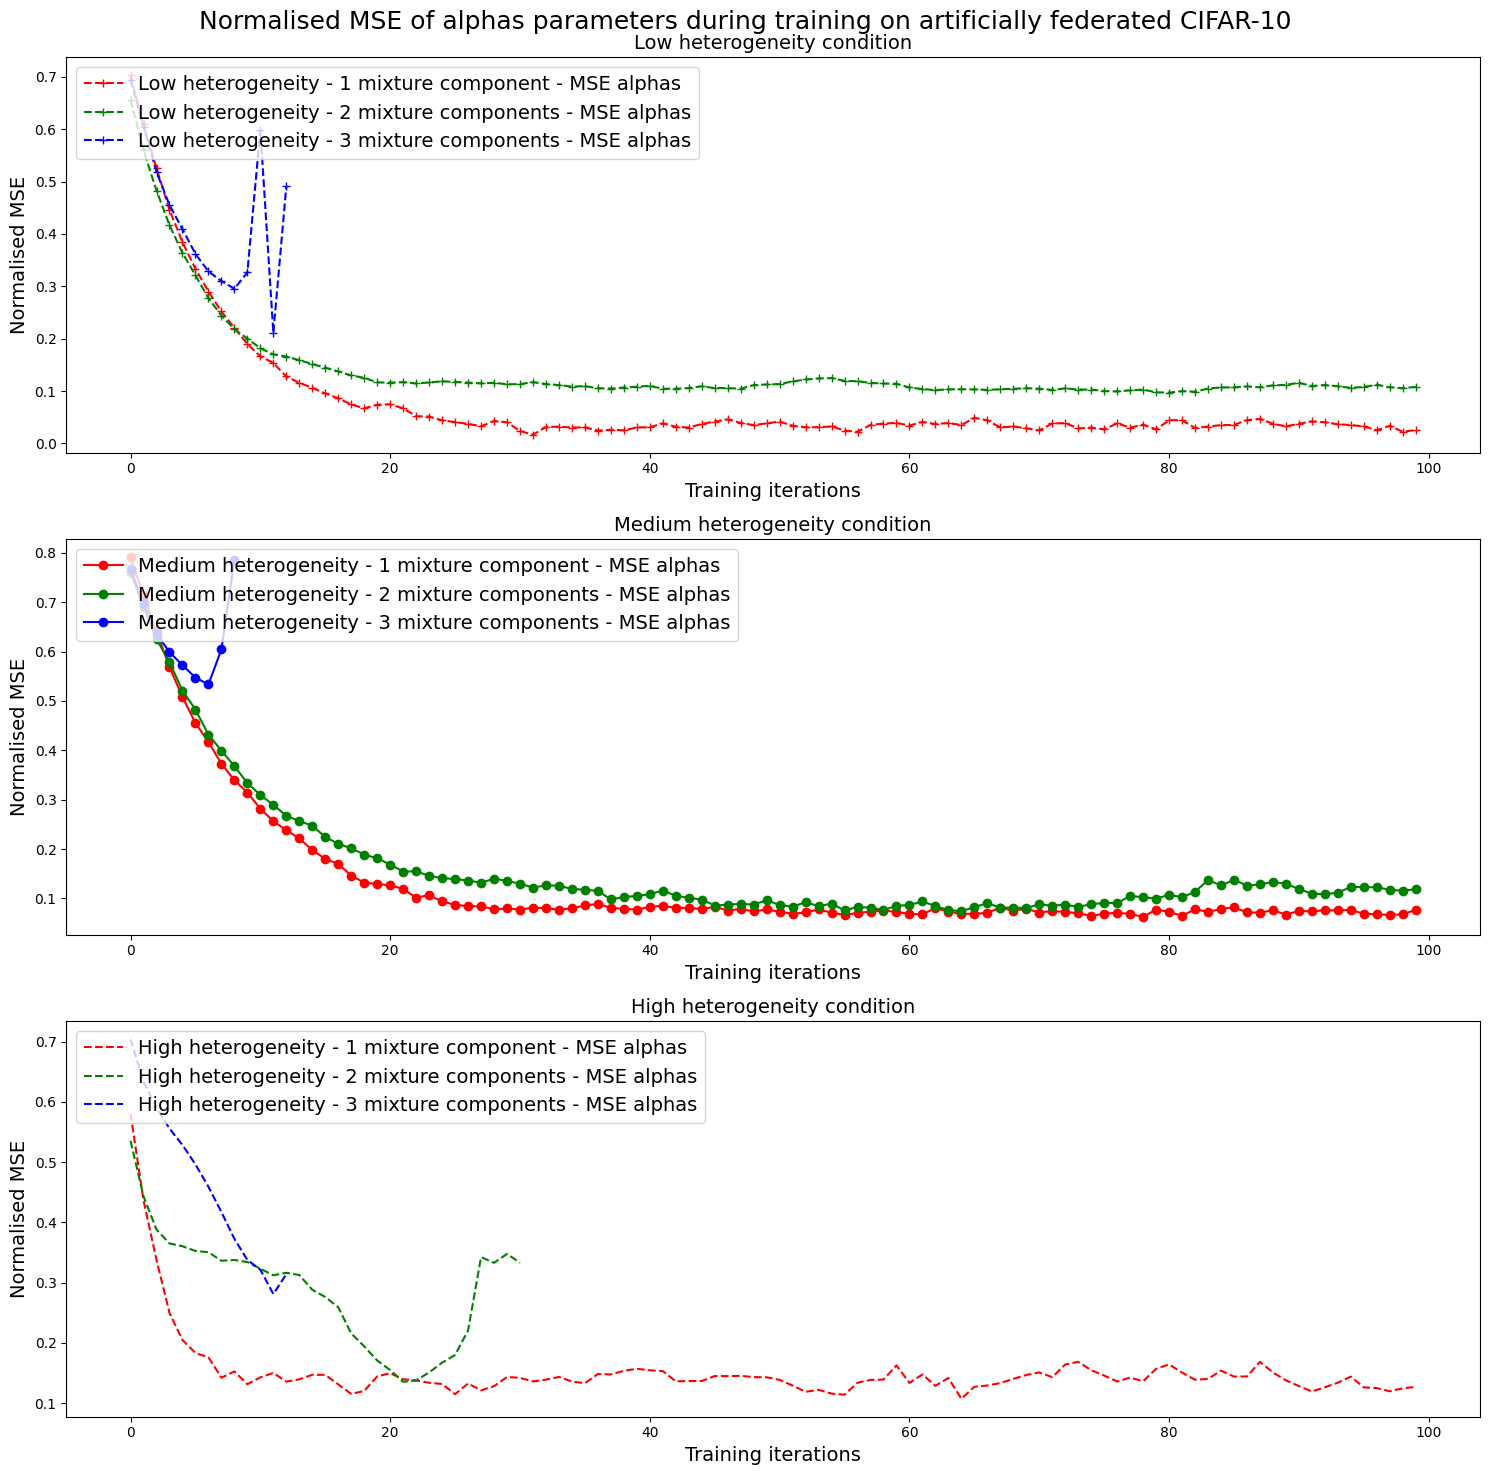

In [37]:
plot(results, 'alphas')

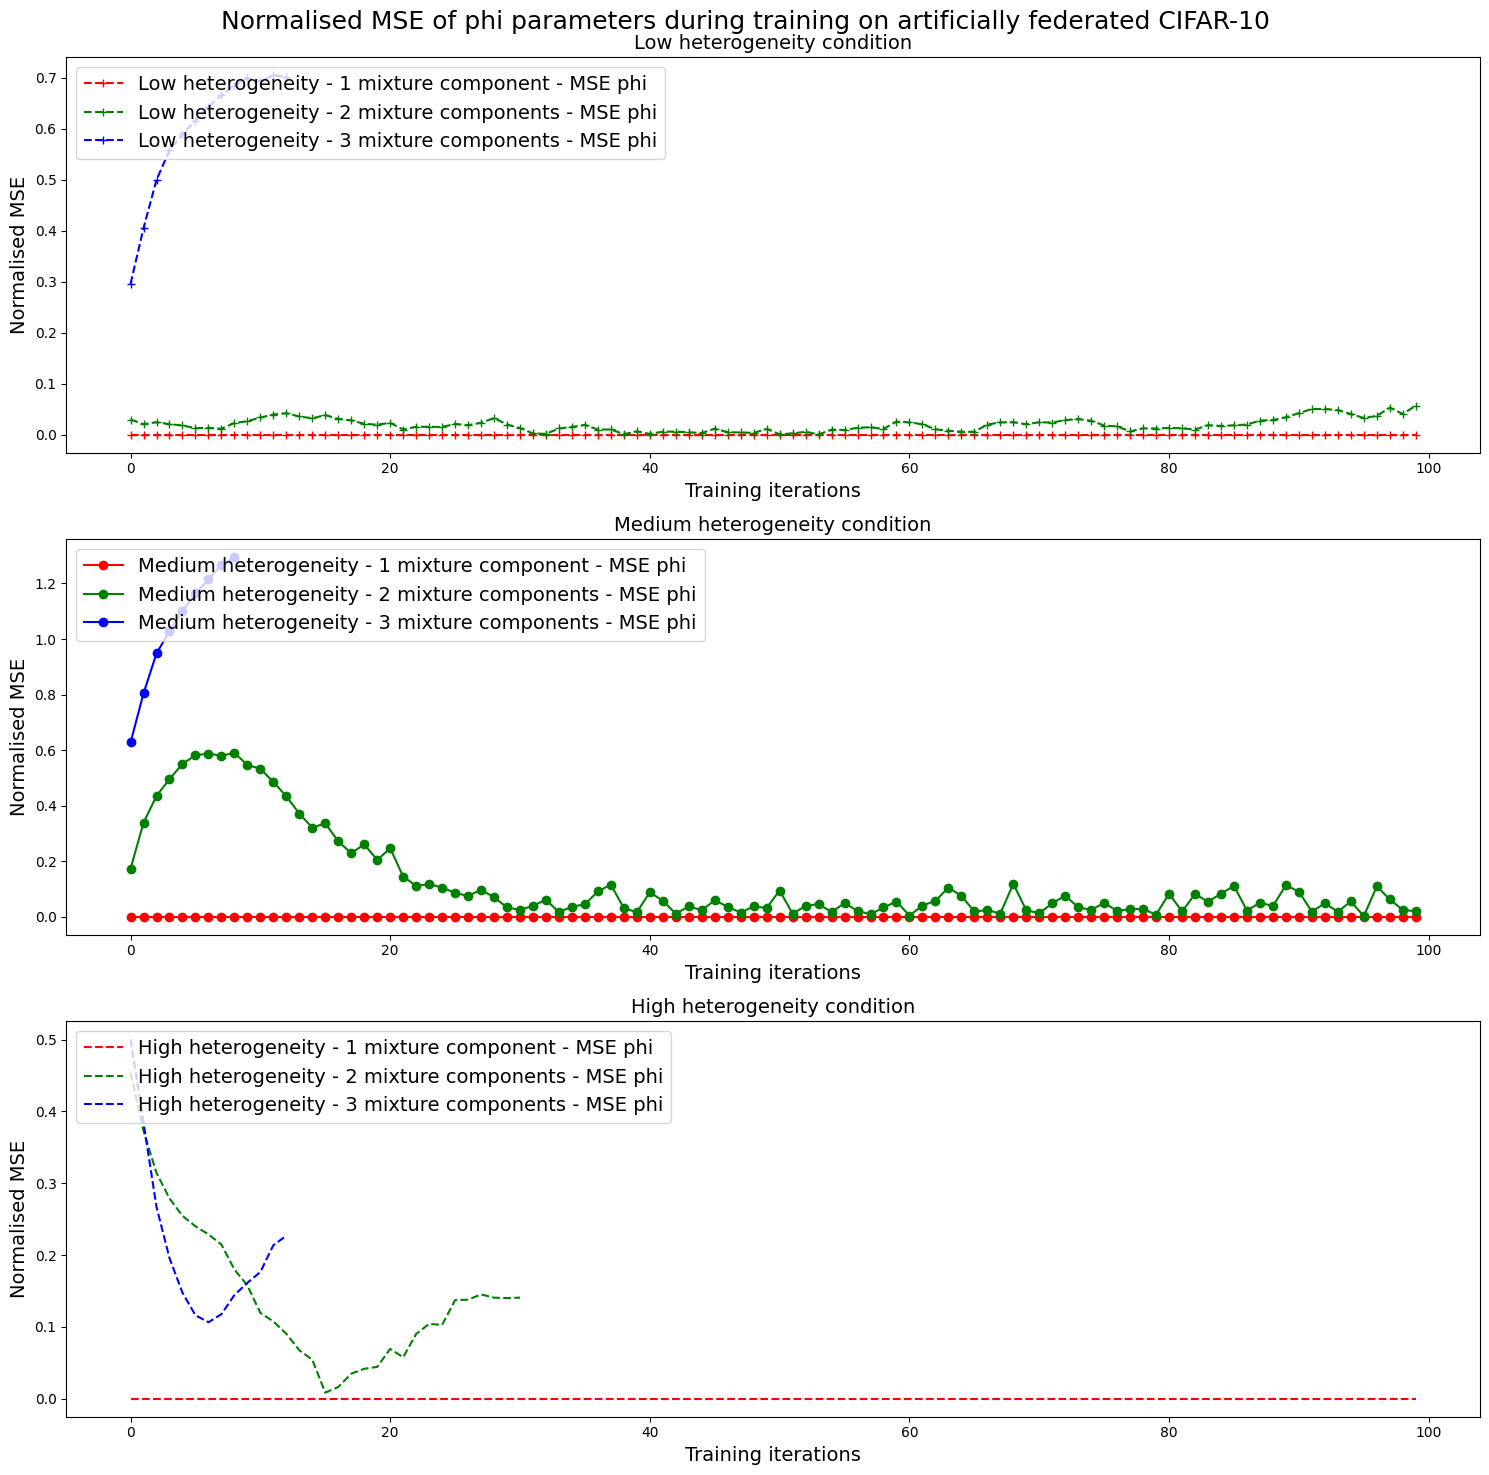

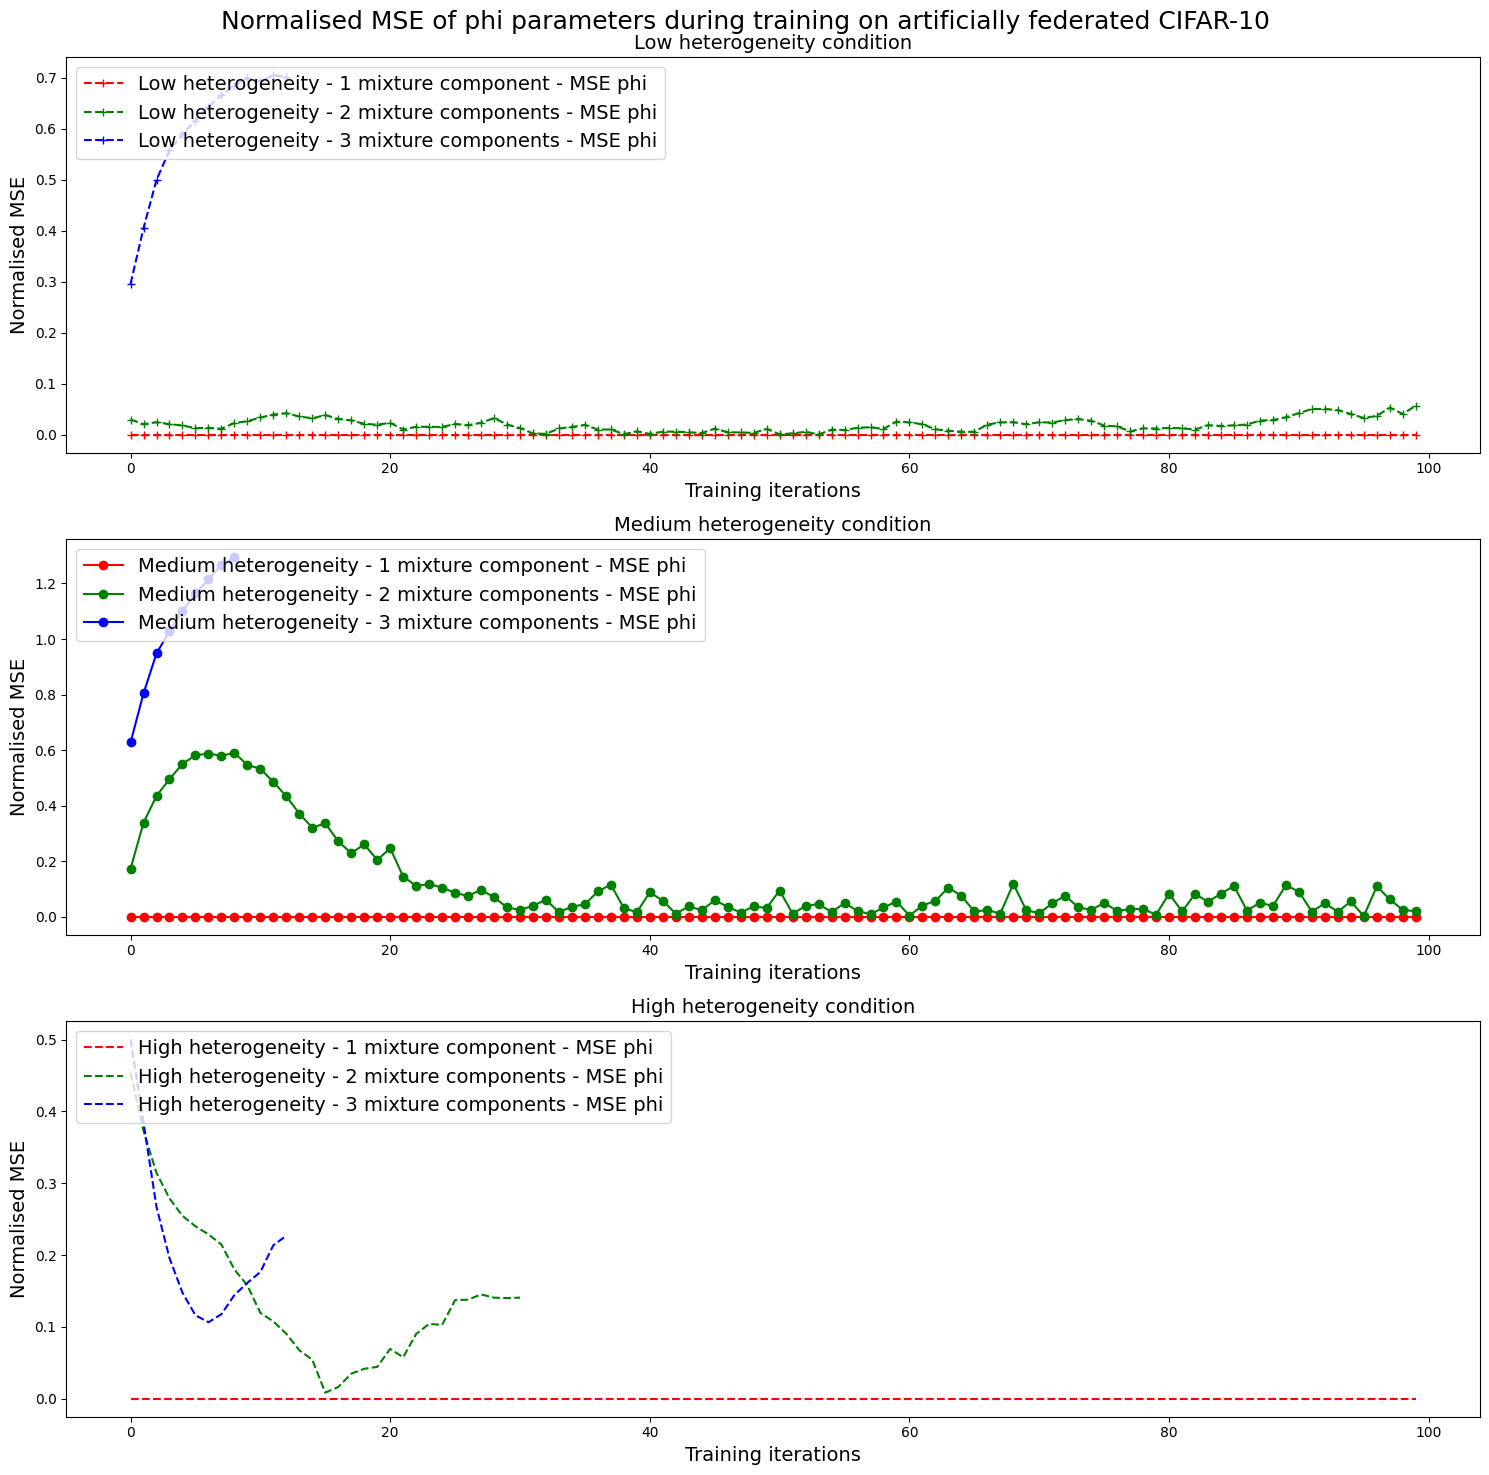

In [38]:
plot(results, 'phi')

In [41]:
joblib.dump(results, 'dp_results_cifar10.joblib')

['dp_results_cifar10.joblib']